In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import numpy as np
import json

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read the Data

In [18]:
second_session_raw_data = pd.read_csv('Data/second_round_data.csv', index_col=0).reset_index().drop(columns=['index'])
# second_session_raw_data = second_session_raw_data[second_session_raw_data.mturkID != 'nan' ]

num_all_experimenters = len(second_session_raw_data.mturkID.unique())
num_excluded_experimenters = 0

second_session_raw_data.head()

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,run_id,condition,rt,url,trial_type,trial_index,time_elapsed,internal_node_id,hitId,workerId,assignmentId,a,tp_a,b,tp_b,c,tp_c,experiment_id,assignmentID,mturkID,hitID,success,timeout,failed_images,failed_audio,failed_video,stimulus,response,exp_stage,view_history,exp_part,question_order,focus_screen,quiz_score,color,cond,cond_action,cond_outcome,block,side,x_circle,y_circle,choice,correct,curr_bonus,trial_bonus,outcome,feedback_points,prob_fall,expected_feedback,agg_fb_pts,error_block,num_gos,num_nogos,suspicious,exp_final_status,recorded_at,ip,user_agent,device,browser,browser_version,platform,platform_version,source_code_version,suspicious_type
0,1,1,36097.60000002384,https://raw.githubusercontent.com/Sepsad/Ortho...,external-html,0,36546,0.0-0.0,3AA88CN98Q617OQQ2URCBI4VXVWKYR,A3CGQOJC28OVGN,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,4P6F2,4P6F2,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,332332,332332,GNG_9d08jhh8,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,A3CGQOJC28OVGN,3AA88CN98Q617OQQ2URCBI4VXVWKYR,"""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:27:48,75.41.166.226,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Macintosh,Chrome,95.0.4638.69,OS X,10_15_7,e2c51b786386a28786cab1eaf4849cf4,NaN
1,1,1,11928.100000023842,https://raw.githubusercontent.com/Sepsad/Ortho...,external-html,1,48695,0.0-1.0,3AA88CN98Q617OQQ2URCBI4VXVWKYR,A3CGQOJC28OVGN,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,4P6F2,4P6F2,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,332332,332332,GNG_9d08jhh8,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,A3CGQOJC28OVGN,3AA88CN98Q617OQQ2URCBI4VXVWKYR,"""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:27:48,75.41.166.226,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Macintosh,Chrome,95.0.4638.69,OS X,10_15_7,e2c51b786386a28786cab1eaf4849cf4,NaN
2,1,1,"""","""",preload,2,59239,0.0-2.0,3AA88CN98Q617OQQ2URCBI4VXVWKYR,A3CGQOJC28OVGN,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,4P6F2,4P6F2,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,332332,332332,GNG_9d08jhh8,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,A3CGQOJC28OVGN,3AA88CN98Q617OQQ2URCBI4VXVWKYR,true,false,[],[],[],"""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:27:48,75.41.166.226,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Macintosh,Chrome,95.0.4638.69,OS X,10_15_7,e2c51b786386a28786cab1eaf4849cf4,NaN
3,1,1,4762.5,"""",html-button-response,3,64005,0.0-3.0,3AA88CN98Q617OQQ2URCBI4VXVWKYR,A3CGQOJC28OVGN,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,4P6F2,4P6F2,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,332332,332332,GNG_9d08jhh8,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,A3CGQOJC28OVGN,3AA88CN98Q617OQQ2URCBI4VXVWKYR,"""","""","""","""","""",<img src='../img/welcome.gif' style='height: 2...,0,first_welcome,"""","""","""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:27:48,75.41.166.226,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Macintosh,Chrome,95.0.4638.69,OS X,10_15_7,e2c51b786386a28786cab1eaf4849cf4,NaN
4,1,1,11598.600000023842,"""",instructions,4,75605,0.0-4.0,3AA88CN98Q617OQQ2URCBI4VXVWKYR,A3CGQOJC28OVGN,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,4P6F2,4P6F2,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,332332,332332,GNG_9d08jhh8,3F6HPJW4JE34NNPTOP8MF9SAMW4W2Q,A3CGQOJC28OVGN,3AA88CN98Q617OQQ2URCBI4VXVWKYR,"""","""","""","""","""","""","""",before_instructions,"[{""page_index"":0,""viewing_time"":3005.399999976...",before_instructions,"""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:27:48,75.41.166.226,Mozilla/5

# Apply exclusion criteria

1. Fail the quiz of instructions more than twice.
2. Change the tab or window of the experiment.

In [19]:
experimenter_status = second_session_raw_data[second_session_raw_data.trial_type == 'survey-html-form'][['mturkID', 'exp_final_status']]
IDs_for_exclusion_by_not_completed = experimenter_status[experimenter_status.exp_final_status != 'fully_completed'].mturkID

second_session_clean_data = second_session_raw_data[second_session_raw_data.mturkID.isin(IDs_for_exclusion_by_not_completed) == False]

num_excluded_experimenters = len(second_session_raw_data.mturkID.unique()) - len(second_session_clean_data.mturkID.unique())

print("Number of participants excluded by this criterias:", num_excluded_experimenters)

Number of participants excluded by this criterias: 1


3. Respond randomly, always go or never go.

    * Note: We exclude who repond randomly, always go or nogo in each 3 block

In [20]:
second_session_clean_data[second_session_clean_data.suspicious == 'true'][['mturkID', 'suspicious_type','num_gos', 'block']]

,mturkID,suspicious_type,num_gos,block
27217,ACJ6NSCIWMUZI,error_rate,22,block_2


In [21]:
IDs_for_exclusion_by_random_response = []

num_excluded_experimenters += len(IDs_for_exclusion_by_random_response)

second_session_clean_data = second_session_clean_data[second_session_clean_data.isin(IDs_for_exclusion_by_random_response) == False]

print("Number of participants excluded by this criterias:", len(IDs_for_exclusion_by_random_response))


Number of participants excluded by this criterias: 0


4. Their rate of the correct response to detection of circle side task is less than 55%.

In [22]:
circle_side_correctness = second_session_clean_data[second_session_clean_data.choice == 'go'][['mturkID','side', 'response']]
circle_side_correctness['is_correct_circle_side'] =  (circle_side_correctness.side == circle_side_correctness.response)
accuracy_data = circle_side_correctness.groupby('mturkID').mean().reset_index()
accuracy_data.columns = ['mturkID', 'rate']
accuracy_data['is_below_55'] = accuracy_data.rate < 0.55

accuracy_data.head()


,mturkID,rate,is_below_55
0,A12FTSX85NQ8N9,1.000000,False
1,A1DZMZTXWOM9MR,1.000000,False
2,A1MJVTR0PCKBWW,0.966667,False
3,A1R8A8BK2VN7RH,1.000000,False
4,A1UDOSYE75OYYI,1.000000,False


In [23]:
non_accurate_IDs = accuracy_data[accuracy_data.is_below_55].mturkID

num_excluded_experimenters += len(non_accurate_IDs)

second_session_clean_data = second_session_clean_data[second_session_clean_data.isin(list(non_accurate_IDs)) == False]
print("Number of participants excluded by this criterias:", len(non_accurate_IDs))



Number of participants excluded by this criterias: 2


In [25]:
accuracy_data

,mturkID,rate,is_below_55
0,A12FTSX85NQ8N9,1.000000,False
1,A1DZMZTXWOM9MR,1.000000,False
2,A1MJVTR0PCKBWW,0.966667,False
3,A1R8A8BK2VN7RH,1.000000,False
4,A1UDOSYE75OYYI,1.000000,False
5,A2196WCNDZULFS,1.000000,False
6,A24CG5BTB8KQ39,0.724490,False
7,A24Z9RP5YZZ2TY,1.000000,False
8,A25PFSORDO3SWQ,1.000000,False
9,A2615YW1YERQBO,1.000000,False


# Plot Perforance per conditions

/var/folders/5p/j5wvkpqj2_n5r5h100pdscbr0000gn/T/ipykernel_15291/3804786239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circle_task_logs['correct_action'] = (circle_task_logs.choice == circle_task_logs.cond_action)


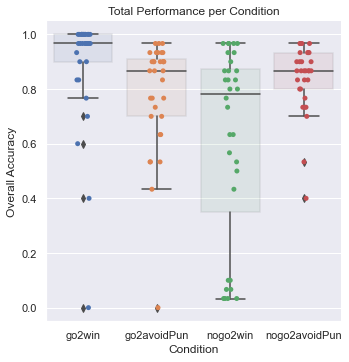

In [8]:
mapping = {'1': 'go2win', '2': 'nogo2win', '3': 'go2avoidPun', '4' : 'nogo2avoidPun'} 

circle_task_logs = second_session_clean_data[second_session_clean_data.exp_stage == 'main_target_detection']

circle_task_logs['correct_action'] = (circle_task_logs.choice == circle_task_logs.cond_action)
performance_per_condition = circle_task_logs.groupby(['mturkID','cond']).mean().reset_index()
performance_per_condition.cond = performance_per_condition.cond.map(mapping)

ax = sns.catplot(x="cond", y="correct", data=performance_per_condition, order= ['go2win','go2avoidPun' ,'nogo2win', 'nogo2avoidPun']);
ax = sns.boxplot(x="cond", y="correct", data= performance_per_condition, boxprops=dict(alpha=.1), order= ['go2win','go2avoidPun' ,'nogo2win', 'nogo2avoidPun']);

ax.set(xlabel="Condition", ylabel = "Overall Accuracy", title = 'Total Performance per Condition')
plt.show()


In [9]:
len(performance_per_condition.mturkID.unique())

32

In [12]:
performance_per_condition.pivot(index='mturkID', columns='cond', values='correct').reset_index().to_csv('Data/second_round_performance_per_condition.csv')

In [15]:
for i in list(set(second_session_raw_data.mturkID.unique()) - set(performance_per_condition.mturkID.unique())):
    print(i)

ACJ6NSCIWMUZI
A1PHDT66U6IK4Q
AQMLJYUQCSG22
